In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from scipy.stats import ks_2samp

# import pyspark as ps    # for the pyspark suite
# from pyspark.sql.types import StructType, StructField
# from pyspark.sql.types import IntegerType, StringType, FloatType, DateType, TimestampType
# import pyspark.sql.functions as F
plt.style.use('seaborn')

# The following cells are where i make the different iterations of clean data sets that will be tested

first final_anime, which was the largest of all the datasets because it kept a lot of unused features. it had mystatus <= 3, and it removed all users that had stated they had watched less than one episode of the anime for the review. 

second, final_anime_2. This was similar to the previous but had less features. It also removed the 3's in my_status, all usernames that occured less than 6 times, and all anime_id's that occured less than 6 times

In [115]:
# make final_anime

# scoresdf = scoresdf.drop('Unnamed: 0', axis = 1)
# anime = anime.drop(['title', 'title_english', 'title_japanese',
#        'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
#        'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
#        'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
#        'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
#        'genre', 'opening_theme', 'ending_theme'], axis = 1)

# scoresdf = scoresdf[['username', 'anime_id', 'my_status', 'my_score', 'my_watched_episodes']]
# userlist = pd.read_csv('UserList.csv')

# scoresdf = scoresdf[(scoresdf['my_status'] == 1) | (scoresdf['my_status'] == 2) | (scoresdf['my_status'] == 3)]

# scoresdf = scoresdf.merge(userlist, on = 'username')
# scoresdf.to_csv('final_anime.csv')
userlist

,username,user_id
0,karthiga,2255153
1,RedvelvetDaisuki,1897606
2,Damonashu,37326
3,bskai,228342
4,shuzzable,2347781
...,...,...
302670,ScruffyPuffy,3119025
302671,Torasori,3975907
302672,onpc,1268417
302673,HMicca,1289601


In [136]:
# scoresdf = pd.read_csv('animelists_cleaned.csv')

# scoresdf
1999363/12111905

0.1650741976592452

In [137]:
# make final_anime_2
# scoresdf.my_score.value_counts() 0 count = 12111905 initial

# scoresdf = pd.read_csv('animelists_cleaned.csv')
# scoresdf = scoresdf[['username', 'anime_id', 'my_status', 'my_score', 'my_watched_episodes']]
# userlist = pd.read_csv('UserList.csv')
# userlist = userlist[['username', 'user_id']]
# scoresdf = scoresdf[(scoresdf['my_status'] == 1) | (scoresdf['my_status'] == 2)]
# scoresdf.my_score.value_counts()  0 count = 3488907, is 0.28805600770481604 of original zeroes


# scoresdf = scoresdf.merge(userlist, on = 'username')
# scoresdf = scoresdf[['anime_id','username', 'my_score', 'user_id', 'my_watched_episodes', 'my_status']]
# scoresdf = scoresdf[scoresdf['my_watched_episodes']>3]
# scoresdf.my_score.value_counts() = 0 count = 2001298 = 0.16523395782909459

# scoresdf= scoresdf.groupby('username').filter(lambda x : len(x)>5)
# scoresdf= scoresdf.groupby('anime_id').filter(lambda x : len(x)>5)
# scoresdf.my_score.value_counts() = 0count =1999363 = 0.1650741976592452

# scoresdf
# scoresdf.to_csv('final_anime_2.csv')

In [8]:
# # make anime_final_3


# scoresdf = pd.read_csv('animelists_cleaned.csv')
# scoresdf = scoresdf[['username', 'anime_id', 'my_status', 'my_score', 'my_watched_episodes']]
# userlist = pd.read_csv('UserList.csv')

# scoresdf = scoresdf[(scoresdf['my_status'] == 1) | (scoresdf['my_status'] == 2) | (scoresdf['my_status'] == 3 | (scoresdf['my_status'] == 4))]

# scoresdf = scoresdf.merge(userlist, on = 'username')
scoresdf = scoresdf[['anime_id','username', 'my_score', 'user_id', 'stats_mean_score', 'my_watched_episodes', 'my_status']]
scoresdf = scoresdf[scoresdf['my_watched_episodes']>3]
scoresdf = scoresdf[scoresdf['my_status'] < 3]
scoresdf= scoresdf.groupby('username').filter(lambda x : len(x)>7)
scoresdf= scoresdf.groupby('anime_id').filter(lambda x : len(x)>7)


# scoresdf.value_counts()

In [ ]:
# scoresdf.to_csv('anime_final_3.csv')

In [54]:
# make anime 4. bad call on first try
# hope = pd.read_csv('final_anime_2.csv')
# keepies = hope.groupby('anime_id').count()[hope.groupby('anime_id').count()['user_id']<=30000].index
# hope = hope[hope['anime_id'] == keepies.any()]
# hope

,Unnamed: 0,anime_id,my_score,user_id,stats_mean_score
57,58,1,10,37326,6.15
243,336,1,10,228342,8.27
554,727,1,8,61677,7.77
826,1063,1,9,2485327,5.49
2473,4217,1,2,144049,7.84
...,...,...,...,...,...
15485504,22593253,1,8,4531053,8.77
15485520,22593275,1,9,240899,7.87
15485577,22593353,1,10,1250731,7.93
15485621,22593439,1,0,442065,8.50


In [45]:
hope

,anime_id,my_score,user_id,stats_mean_score
0,21,9,2255153,7.43
1,59,7,2255153,7.43
2,74,7,2255153,7.43
3,120,7,2255153,7.43
4,178,7,2255153,7.43
...,...,...,...,...
15546705,29575,9,6432461,8.89
15546707,5959,10,6432461,8.89
15546708,1387,10,6432461,8.89
15546709,4600,9,6432461,8.89


In [107]:
# anime 5
hope = pd.read_csv('final_anime_2.csv')
# keepies = hope.groupby('anime_id').count()[hope.groupby('anime_id').count()['user_id']>69].index
# hope = hope[hope['anime_id'].isin(keepies)]
# # keepies2 = hope.groupby('user_id').count()[hope.groupby('user_id').count()['anime_id']>].index
# # hope = hope[hope['anime_id'].isin(keepies2)]
# # hope_insurance = hope.copy()
# keepies3 = ratings_user.sort_values(by = 'anime_id', ascending = False)[ratings_user.sort_values(by = 'anime_id',ascending = False)['anime_id'] >13].index
# hope = hope[hope['anime_id'].isin(keepies3)]
# hope = hope.drop('Unnamed: 0', axis = 1)
# hope.to_csv('anime_final_5.csv')
# hope_insurance
hope.shape

(15546712, 5)

In [34]:
import numpy as np
p = np.percentile(ratings_count['username'].sort_values(ascending = False), 2.5)
j = np.percentile(ratings_user.anime_id.sort_values(ascending = False), 2.5)
              
j 
# p

12.0

In [11]:
userlist = pd.read_csv('userlist.csv')
userlist = userlist[['username', 'user_id']]
ratings_user = ratings_user.merge(userlist, on = 'username')

ratings_user

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags,user_id
0,----phoebelyn,101,101,101,101,101,101,101,101,101,0,36961
1,---L-AND-AME-4EV,2,2,2,2,2,2,2,2,2,0,254842
2,--AnimeBoy--,359,359,359,359,359,359,77,359,359,0,2391631
3,--Etsuko--,116,116,116,116,116,116,116,116,116,0,5375446
4,--FallenAngel--,525,525,525,525,525,525,429,525,525,0,109260
...,...,...,...,...,...,...,...,...,...,...,...,...
108704,zzshinzozz,199,199,199,199,199,199,14,199,199,0,565015
108705,zzvl,63,63,63,63,63,63,10,63,63,0,899187
108706,zzz275,156,156,156,156,156,156,156,156,156,0,96717
108707,zzzcielo,467,467,467,467,467,467,301,467,467,30,398823


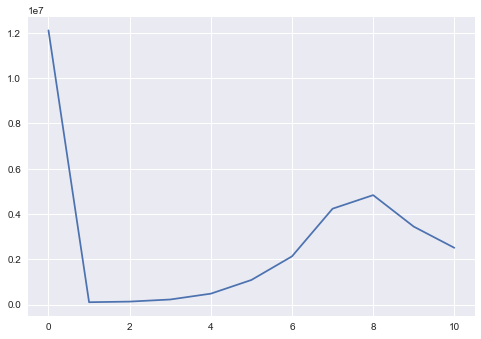

In [59]:
# score = scoresdf.groupby("my_score").count()
# score
fig,ax = plt.subplots()
plt.plot(range(0,11),score.username)

In [127]:
ratings_user.anime_id.sort_values(ascending = False)

19402     6536
104796    6367
27977     5923
15093     5912
30442     5234
          ... 
17641        1
39503        1
97568        1
52271        1
65089        1
Name: anime_id, Length: 108709, dtype: int64

Text(0, 0.5, 'Counts')

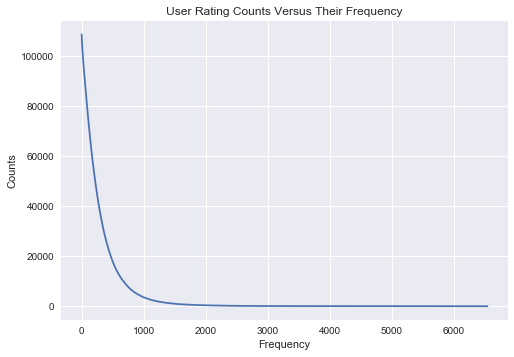

In [129]:
# ratings_user = scoresdf.groupby("username").count()

fig, ax = plt.subplots()
plt.plot(ratings_user.anime_id.sort_values(ascending = False), range(108709))
plt.title("User Rating Counts Versus Their Frequency")
plt.xlabel("Frequency")
plt.ylabel("Counts")
# # plt.show()

In [55]:
# ratings_count = scoresdf.groupby("anime_id").count()

ratings_count.username.sort_values()

anime_id
37493        1
37494        1
36818        1
37896        2
37255        2
         ...  
4224     63277
5114     63648
226      64485
1575     67721
1535     81331
Name: username, Length: 6668, dtype: int64

In [139]:
# ratings_count = scoresdf.groupby("anime_id").count()
ratings_count

Text(0, 0.5, 'Counts')

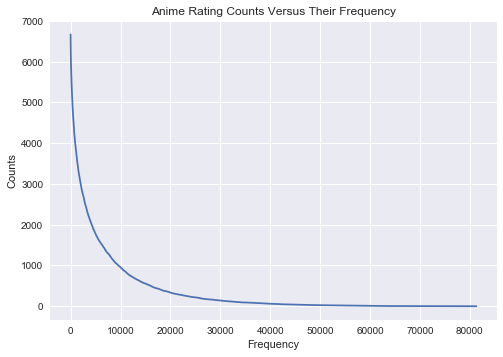

In [130]:
# ratings_count = scoresdf.groupby("anime_id").count()
fig, ax = plt.subplots()
plt.plot( ratings_count['username'].sort_values(ascending = False),range(6668))
plt.title("Anime Rating Counts Versus Their Frequency")
plt.xlabel("Frequency")
plt.ylabel('Counts')
# plt.show()

In [61]:
scoresdf_1 = scoresdf['user_id'].dropna()
scoresdf_1

0           2255153
1           2255153
2           2255153
3           2255153
4           2255153
             ...   
31284025    4862000
31284026    4862000
31284027     299167
31284028     263803
31284029      48074
Name: user_id, Length: 31284030, dtype: int64

Text(0.5, 1.0, 'Histogram of the Counts of User Ratings in scoresdf')

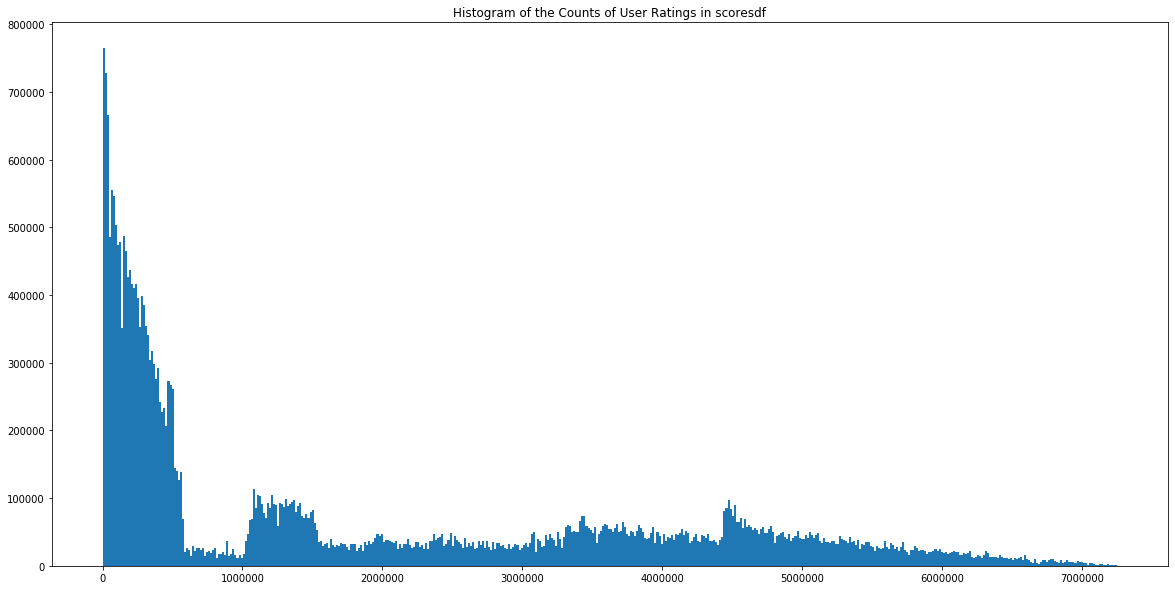

In [97]:
# Things i need:
# histogram showing counts of ratings by anime and counts of ratings by user ( how many times has each yse)
# userlist = pd.read_csv('UserList.csv')
# scoresdf = scoresdf.drop('user_id', axis =1)
# scoresdf = scoresdf.merge(userlist[['username', 'user_id']], on = 'username')
fig, ax = plt.subplots(figsize = (20,10))
# scoresdf['user_id'] = scoresdf['user_id'].dropna(inplace = True)

plt.hist(scoresdf_1, bins = 500)
ax.set_title('Histogram of the Counts of User Ratings in scoresdf')
# ax.set_xlim(0, 7000000)

(0, 40000)

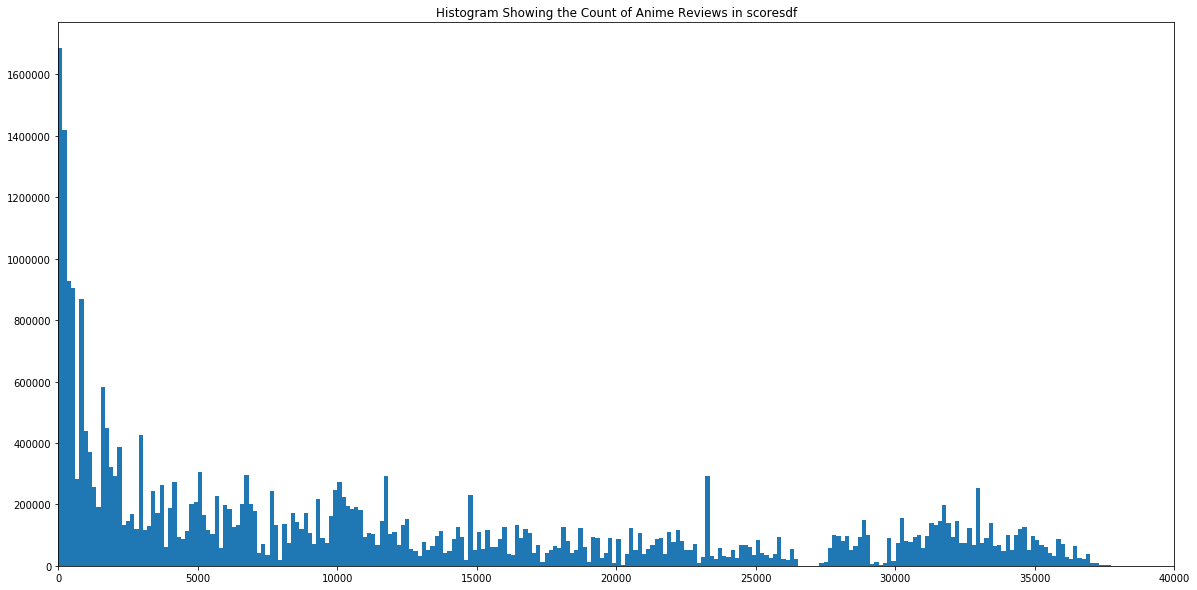

In [63]:
# scoresdf['anime_id'] = scoresdf['anime_id'].dropna()
fig, ax = plt.subplots(figsize = (20,10))
plt.hist(scoresdf.anime_id, bins = 250)
ax.set_title('Histogram Showing the Count of Anime Reviews in scoresdf')
ax.set_xlim(0, 40000)
ax.set_ylabel('Counts of anime reviews')
# scoresdf

# Original Scores dataframe eda
date range = 2006-09-27 to 2018-05-22

count of reviews range by user = Exxorn (6536) to many with only 1 review

average score by user before removing a ton of zeros = 4.653545913136742

count of users = 108675

count of reviews range by anime = animeid =  1535, count = 80759, min is one for three 37494, 37493, 36818 

average score for anime before removing a ton of zeros  = 6.142481696366902

count of anime = 14478


There are significantly more 0 reviews than any other, with them comprising 12111905 of the original 31284030


In [6]:
# get the range of the scores
scoresdf = scoresdf[scoresdf['my_last_updated']> '1970-01-01 00:00:00']
scoresdf.sort_values(by = 'my_last_updated')

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
5300,Xinil,396,4,2004-01-11,0000-00-00,0,4,0.0,0,2006-09-27 06:12:23,NaN
8549214,Aokaado,50,9,2005-01-21,0000-00-00,6,4,0.0,0,2006-09-27 08:57:19,NaN
4771721,Condoriano,985,1,0000-00-00,0000-00-00,8,2,0.0,0,2006-09-27 09:09:16,NaN
4771722,Condoriano,986,1,0000-00-00,0000-00-00,7,2,0.0,0,2006-09-27 09:09:44,NaN
8549018,Aokaado,210,161,2004-06-07,2006-09-27,9,2,0.0,0,2006-09-27 19:59:25,"comedy, action, episodic, school, martial arts"
...,...,...,...,...,...,...,...,...,...,...,...
17290693,Zubinsenpai,36864,7,0000-00-00,0000-00-00,0,1,0.0,0,2018-05-22 07:22:45,NaN
17290736,Zubinsenpai,36001,7,0000-00-00,0000-00-00,0,1,0.0,0,2018-05-22 07:22:46,NaN
17290444,Zubinsenpai,35849,18,2018-02-10,0000-00-00,0,1,0.0,0,2018-05-22 07:23:07,NaN
17290682,Zubinsenpai,36296,7,0000-00-00,0000-00-00,0,1,0.0,0,2018-05-22 07:23:27,NaN


In [76]:
preds = pd.read_csv('preds.csv')
preds

,user_id,anime_id,my_score,rating
0,252259,148,7,4.595370
1,285987,148,7,6.744545
2,91084,148,6,6.827926
3,42349,148,5,5.936615
4,100477,148,8,6.794147
...,...,...,...,...
4399169,28168,36480,0,2.381530
4399170,4091949,36480,0,0.566975
4399171,183758,36480,0,-0.268025
4399172,3437395,36480,8,6.435800


In [149]:
ks_2samp(preds.rating, preds.my_score)

Ks_2sampResult(statistic=0.32075453255542974, pvalue=0.0)

In [144]:
# preds['rounded_pred'] = preds.rating.round()
preds.rounded_pred.value_counts()


 7.0     1151148
 8.0      865859
 6.0      811821
 5.0      419315
 9.0      303752
-0.0      229401
 4.0      213870
 3.0      129792
 1.0      109705
 2.0      101520
 10.0      48021
-1.0       11546
 11.0       2220
-2.0         934
 12.0        122
-3.0         119
-4.0          12
 13.0         11
-5.0           4
 14.0          2
Name: rounded_pred, dtype: int64

In [149]:
preds.my_score.value_counts()

8     952308
7     821142
0     731358
9     679416
10    490749
6     396797
5     186581
4      74958
3      33794
2      18602
1      13469
Name: my_score, dtype: int64

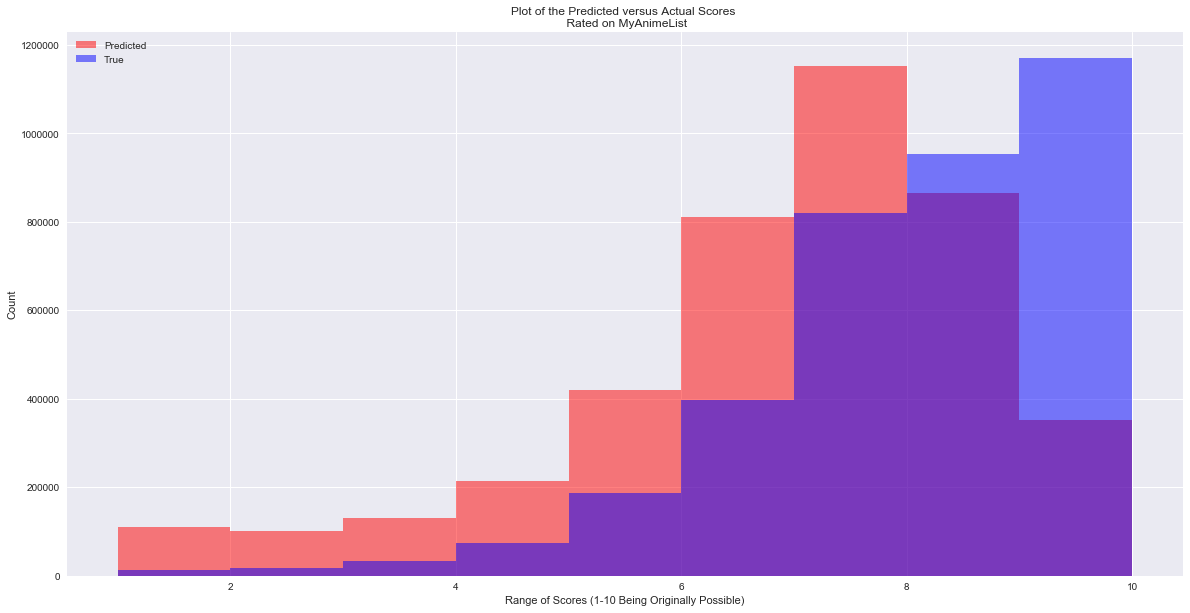

In [151]:
# plot of actual versus rounded predicted hist
# should i use rounded instead to get them in bins? answer no
fig, ax = plt.subplots(figsize = (20,10))

plt.hist(preds.rounded_pred,  bins = [1,2,3,4,5,6,7,8,9,10], color = 'red', alpha = .5, label = 'Predicted')
plt.hist(preds.my_score, bins = [1,2,3,4,5,6,7,8,9,10], color = 'blue', alpha =.5, label = 'True')
ax.set_title('Plot of the Predicted versus Actual Scores \n Rated on MyAnimeList')
ax.set_ylabel('Count')
ax.set_xlabel('Range of Scores (1-10 Being Originally Possible)')
ax.legend()

(0, 11)

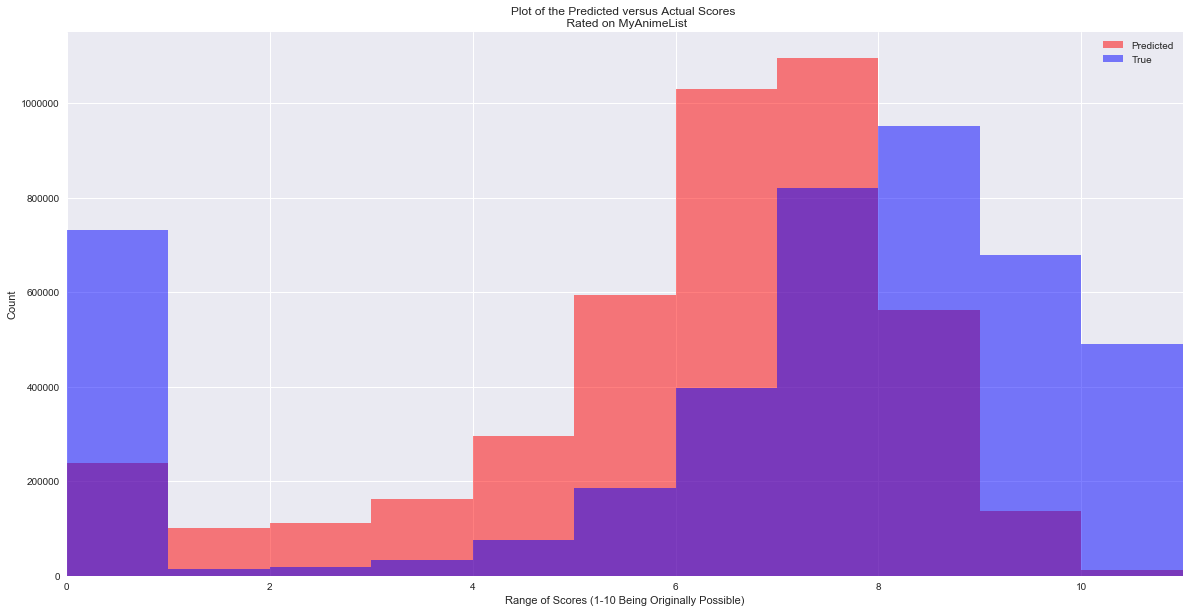

In [159]:
# plot of actual versus predicted hist
fig, ax = plt.subplots(figsize = (20,10))

plt.hist(preds.rating,  bins = range(15), color = 'red', alpha = .5, label = 'Predicted')
plt.hist(preds.my_score, bins = range(15), color = 'blue', alpha =.5, label = 'True')
ax.set_title('Plot of the Predicted versus Actual Scores \n Rated on MyAnimeList')
ax.set_ylabel('Count')
ax.set_xlabel('Range of Scores (1-10 Being Originally Possible)')
ax.legend()
ax.set_xlim(0,11)

In [148]:
preds2

,user_id,anime_id,my_score,rating
0,36458,243,8,7.265403
1,39210,243,0,0.000000
2,229552,243,9,8.123438
3,262304,243,0,0.000000
4,468553,243,8,7.098500
...,...,...,...,...
3112908,3882929,31519,5,5.122983
3112909,4467862,31519,7,5.089931
3112910,5446900,31519,5,4.575069
3112911,5260093,31519,6,4.868383


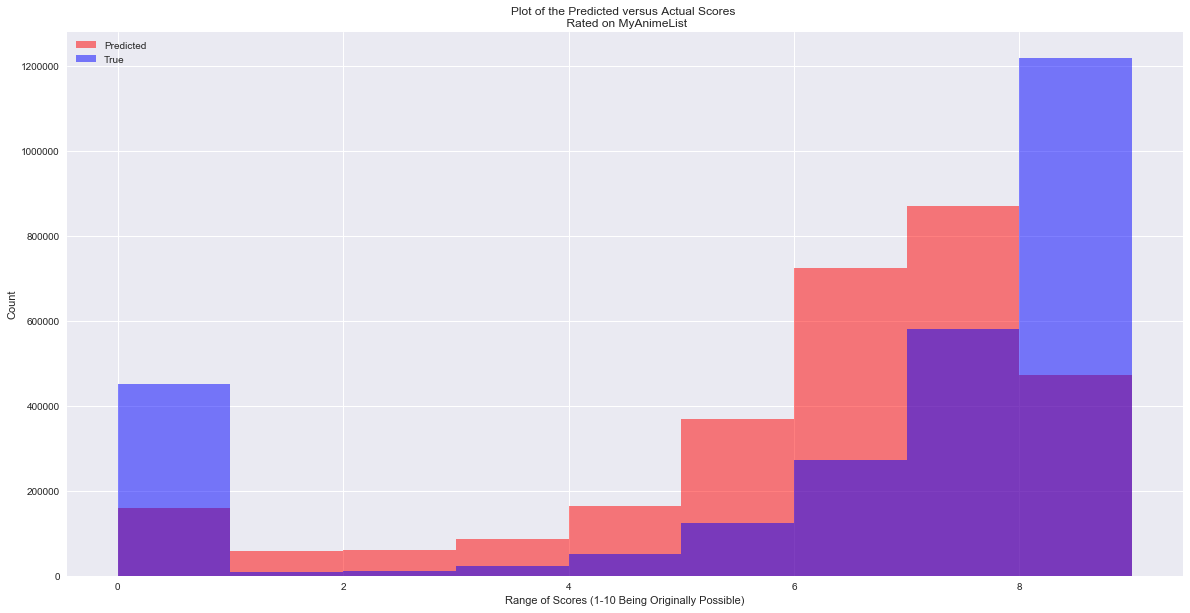

In [147]:
# looking at other preds to see if hist is fluke
preds2 = pd.read_csv('preds2.csv')
fig, ax = plt.subplots(figsize = (20,10))

plt.hist(preds2.rating,  bins = range(10), color = 'red', alpha = .5, label = 'Predicted')
plt.hist(preds2.my_score, bins = range(10), color = 'blue', alpha =.5, label = 'True')
ax.set_title('Plot of the Predicted versus Actual Scores \n Rated on MyAnimeList')
ax.set_ylabel('Count')
ax.set_xlabel('Range of Scores (1-10 Being Originally Possible)')
ax.legend()

In [164]:
# check to see if train test - distributions are similar
import pyarrow
test = pd.read_parquet('test_set.parquet', engine = 'pyarrow')
train = pd.read_parquet('train_set.parquet', engine = 'pyarrow')


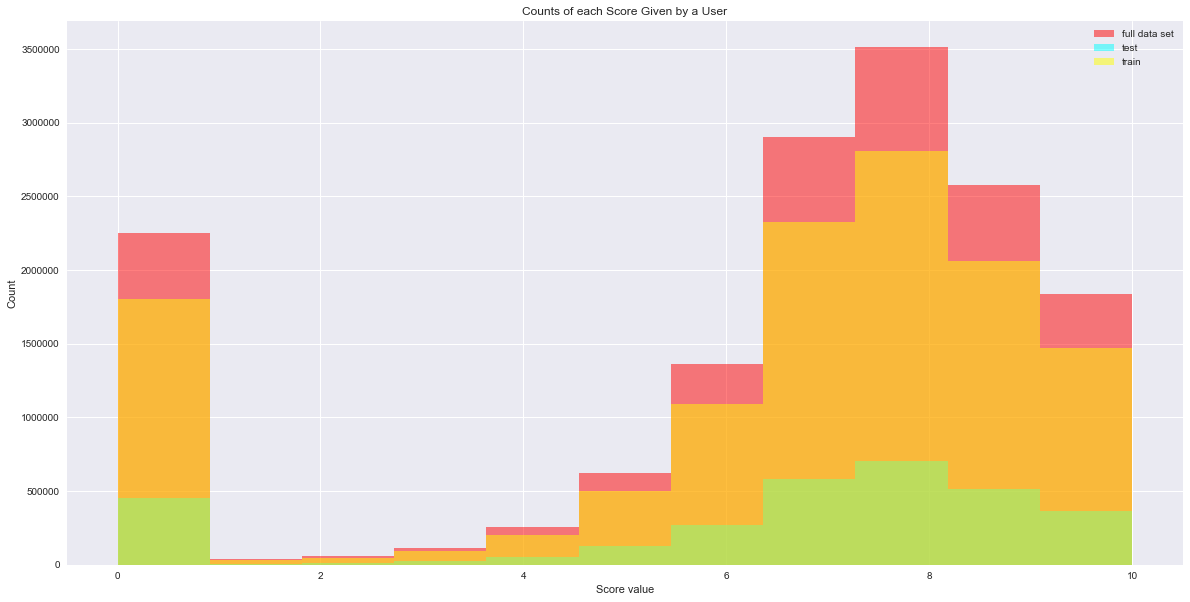

In [174]:
# df = pd.read_csv('final_anime_2.csv')
fig, ax = plt.subplots(figsize = (20,10))
plt.hist(df.my_score, bins = 11, color = 'red', alpha = .5, label = 'full data set')
plt.hist(test.my_score, bins = 11, color = 'cyan', alpha = .5, label = 'test')
plt.hist(train.my_score, bins = 11, color = 'yellow', alpha =.5, label = 'train')
# plt.plot(range(0,11),score.username, color = 'black')
ax.set_title('Counts of each Score Given by a User')
ax.set_xlabel('Score value')
ax.set_ylabel('Count')
ax.legend()

In [6]:
scoresdf.merge
# score.average()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31284025,Yokonightcore,15611,48,2014-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:33:03,NaN
31284026,Yokonightcore,27815,22,0000-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:32:05,NaN
31284027,wargod,5945,39,0000-00-00,0000-00-00,8,2,0.0,0,2010-03-29 04:24:12,NaN
31284028,JMc_SetoKai_LoVe,1316,52,0000-00-00,0000-00-00,9,2,NaN,0,2009-12-23 05:45:14,NaN


In [8]:
scoresdf.my_score.mean()

4.652314775302287

In [38]:
userprofile_2255153 = scoresdf[scoresdf['user_id'] == 2255153]
userprofile_2255153.to_csv('test_user_profile.csv')

In [21]:
# most watched anime = scoresdf[scoresdf['anime_id']==1535]
# scoresdf[scoresdf['anime_id']==1575]
# scoresdf[scoresdf['anime_id']==226]
# scoresdf[scoresdf['anime_id']==5114]
# scoresdf[scoresdf['anime_id']==4224]
scoresdf.username.value_counts()

Exxorn           6536
uemmega          6367
JakCooper2       5923
DeadlyKizuna     5912
KanaenuYume      5234
                 ... 
aris77              1
blackwing29         1
IdiotIvan           1
NecroSeraphim       1
prabashiloveu       1
Name: username, Length: 108709, dtype: int64

(array([1.02004e+05, 1.35820e+04, 4.38110e+04, ..., 0.00000e+00,
        1.10000e+01, 9.00000e+00]),
 array([1.00000000e+00, 6.68311338e+00, 1.23662268e+01, ...,
        3.78846338e+04, 3.78903169e+04, 3.78960000e+04]),
 <a list of 6668 Patch objects>)

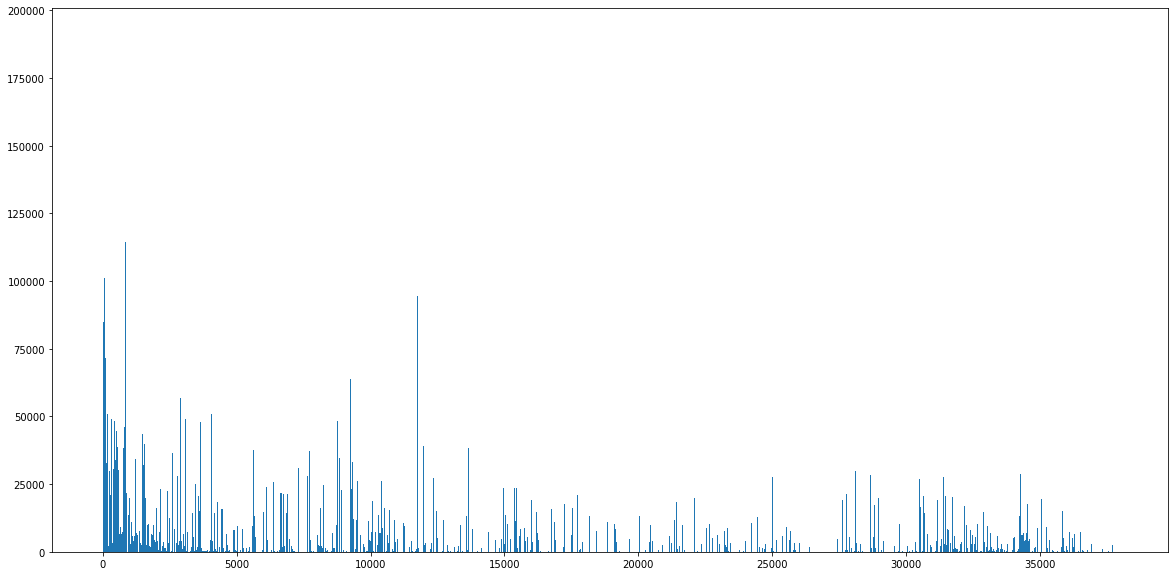

In [20]:

fig, ax = plt.subplots(figsize = (20,10))
ax.hist(scoresdf.anime_id, bins = 6668)
# ax.set_xlim(0,2000)

In [99]:
x = scoresdf.username.dropna()
fig, ax = plt.subplots(figsize = (20,10))
ax.hist(x, bins = 1500)
# ax.set_xlim(0,1500)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1163ac320> (for post_execute):


KeyboardInterrupt: 

Text(0, 0.5, 'Count')

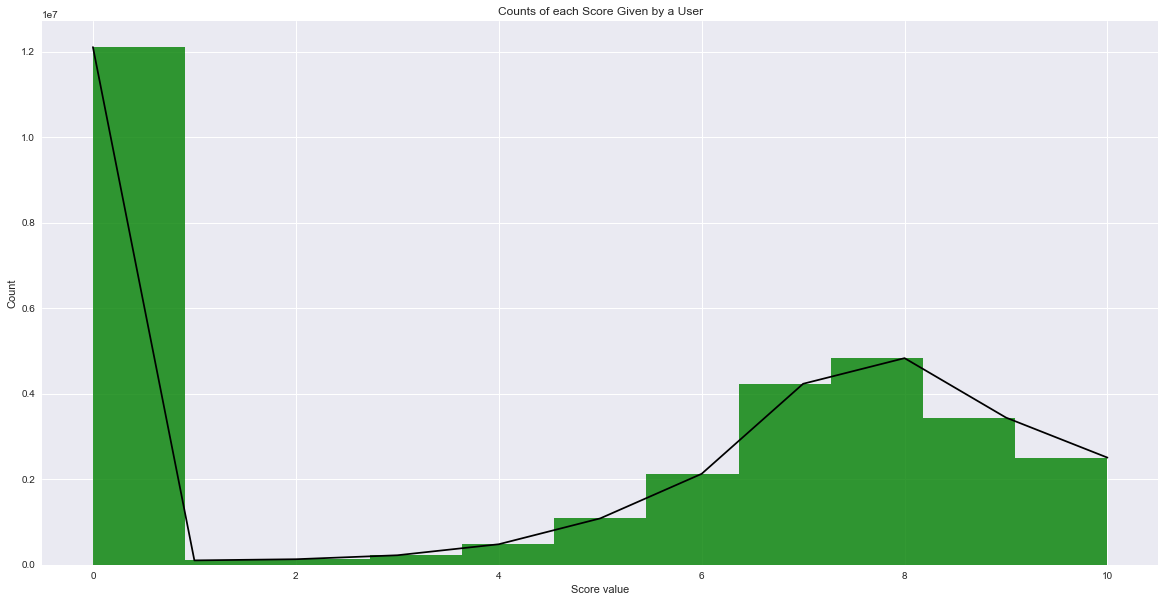

In [97]:
# len(scoresdf.username.unique()) =108710
# len(scoresdf.anime_id.unique()) =  666
fig, ax = plt.subplots(figsize = (20,10))
plt.hist(scoresdf.my_score, bins = 11, color = 'green', alpha = .8)
plt.plot(range(0,11),score.username, color = 'black')
ax.set_title('Counts of each Score Given by a User')
ax.set_xlabel('Score value')
ax.set_ylabel('Count')

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
plt.hist(scoresdf.my_score, bins = 11, color = 'yellow', alpha = .8)
plt.plot(range(0,11),score.username, color = 'black')
ax.set_title('Counts of each Score Given by a User')
ax.set_xlabel('Counts')
ax.set_ylabel('Value')

Text(0.5, 1.0, "histogram of the anime's average ratings")

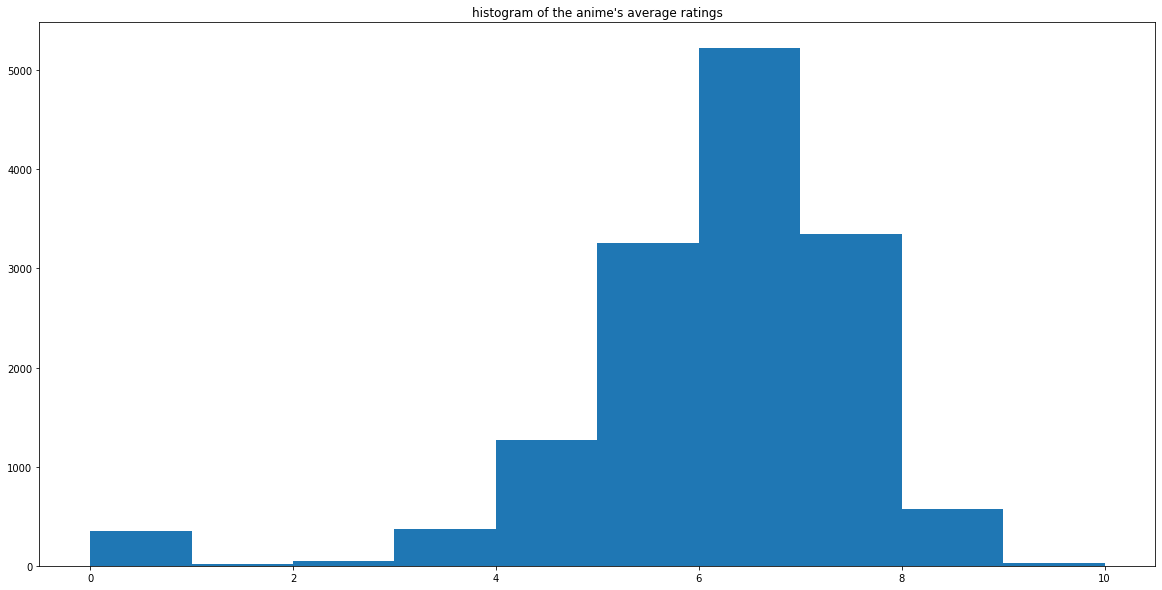

In [26]:
fig, ax = plt.subplots(figsize = (20,10))
plt.hist(animedf.score)
ax.set_title("histogram of the anime's average ratings")

In [4]:
df

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,1362307973,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,1362923691,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,1367081015,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,1362308037,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,1364399953,NaN
...,...,...,...,...,...,...,...,...,...,...,...
80076107,mini_kaila,5940,4,0000-00-00,0000-00-00,8,1,0.0,0,1256326186,NaN
80076108,mini_kaila,6030,0,0000-00-00,0000-00-00,0,4,NaN,0,1254150549,NaN
80076109,mini_kaila,6500,1,0000-00-00,0000-00-00,8,3,0.0,0,1263503239,NaN
80076110,mini_kaila,7058,0,0000-00-00,0000-00-00,8,3,0.0,0,1272110959,NaN


In [ ]:
# df.my_last_updated.max() = 1526976068
# df.my_last_updated = pd.to_datetime(df.my_last_updated, unit = 's')
# df['username'].value_counts()
frequencies = df['username'].value_counts()

condition = frequencies<5   # you can define it however you want
mask_obs = frequencies[condition].index
mask_dict = dict.fromkeys(mask_obs, 'miscellaneous')

df['username'] = df['username'].replace(mask_dict) 

In [42]:
# df_clean.username.isnull().sum() = 261
print(f'the null count in username is {df_clean.username.isnull().sum()}')
print(f'the null count in anime_id is {df_clean.anime_id.isnull().sum()}')
print(f'the null count in my_watched_episodes is {df_clean.my_watched_episodes.isnull().sum()}')
print(f'the null count in my_score is {df_clean.my_score.isnull().sum()}')
print(f'the null count in my_status is {df_clean.my_status.isnull().sum()}')
print(f'the null count in my_rewatching is {df_clean.my_rewatching.isnull().sum()}')
print(f'the null count in my_last_updated is {df_clean.my_last_updated.isnull().sum()}')

the null count in username is 261
the null count in anime_id is 0
the null count in my_watched_episodes is 0
the null count in my_score is 0
the null count in my_status is 0
the null count in my_rewatching is 0
the null count in my_last_updated is 0


In [36]:
df_clean['my_rewatching']= df_clean['my_rewatching'].fillna(0)
df_clean['my_rewatching'].value_counts()

0.0    80030262
1.0       45850
Name: my_rewatching, dtype: int64

In [ ]:
df2 = None

In [65]:
# df3.last_online.max() =  '2018-05-25 12:50:00'
# df3.last_online.min() = '2007-04-09 16:16:00'

'2007-04-09 16:16:00'

In [14]:
# uniques
# len(df.username.unique()) = 283045
# len(df.anime_id.unique()) = 14478

In [9]:
userlist = pd.read_csv('UserList.csv')

/Users/JamesSkelton/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/JamesSkelton/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 30922.,    191.,    123.,    260.,   1098.,   5370.,  30245.,
        107064.,  89968.,  37305.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

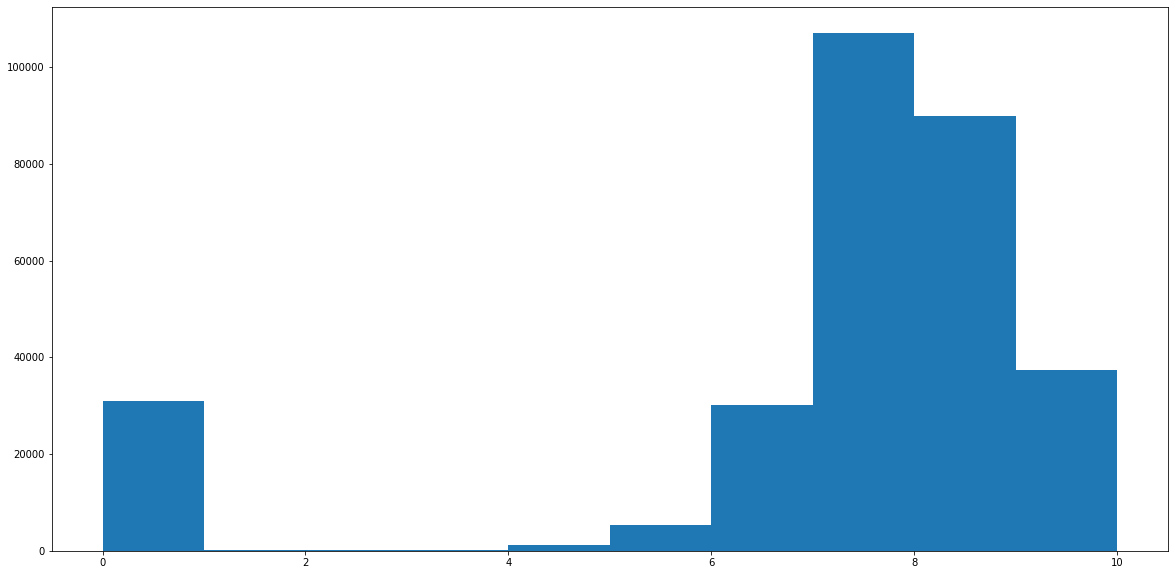

In [5]:
# userlist hist of mean score
fig, ax = plt.subplots(figsize = (20,10))
plt.hist(userlist.stats_mean_score)


In [8]:
# histogram showing counts of ratings by anime and counts of ratings by user ( how many times has each yse)


,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,shuzzable,2347781,36,72,16,2,25,35.48,NaN,NaN,NaN,NaN,2013-03-25,2015-09-09 21:54:00,9.06,7.0,2154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302670,ScruffyPuffy,3119025,0,27,0,0,0,7.92,NaN,NaN,NaN,NaN,2013-09-06,2014-10-10 09:04:00,0.00,0.0,477.0
302671,Torasori,3975907,22,239,0,4,176,86.88,Male,"Latvia, Riga",1998-11-18,NaN,2014-07-30,2018-05-24 21:34:46,8.98,47.0,5313.0
302672,onpc,1268417,5,169,2,5,24,38.36,Male,NaN,NaN,NaN,2012-04-23,2016-12-28 14:35:00,7.72,0.0,2280.0
302673,HMicca,1289601,11,73,2,2,16,119.97,Female,"Birmingham, England",1995-08-12,NaN,2012-05-05,2012-11-15 08:10:00,8.89,11.0,7049.0


In [10]:
df = scoresdf.merge(userlist, on = 'username')

In [33]:
df = df[['anime_id', 'user_id', 'my_watched_episodes', 'my_status', 'my_score', 'stats_mean_score', 'stats_episodes']]

In [34]:
# df = df[['anime_id', 'user_id', 'my_score', 'my_last_updated', 'stats_mean_score']]
# df = df[['anime_id', 'user_id', 'my_score', 'stats_mean_score', 'user_completed', 'user_watching']]
df = df[df['my_watched_episodes']>3]
df = df[df['stats_episodes']>3]
df = df[['anime_id', 'user_id', 'my_score', 'stats_mean_score']]
df

,anime_id,user_id,my_score,stats_mean_score
0,11013,2255153,8,7.43
1,2104,2255153,7,7.43
2,5262,2255153,7,7.43
3,721,2255153,7,7.43
4,12365,2255153,8,7.43
...,...,...,...,...
22691301,1629,336452,0,0.00
22691302,1835,110255,10,10.00
22691303,1728,290011,9,9.00
22691306,1110,223688,10,10.00


In [35]:
# df.to_csv('final_dataset.csv')

In [36]:
# df

,anime_id,user_id,my_score,stats_mean_score
0,11013,2255153,8,7.43
1,2104,2255153,7,7.43
2,5262,2255153,7,7.43
3,721,2255153,7,7.43
4,12365,2255153,8,7.43
...,...,...,...,...
22691301,1629,336452,0,0.00
22691302,1835,110255,10,10.00
22691303,1728,290011,9,9.00
22691306,1110,223688,10,10.00


In [56]:
# print(anime.columns)
# print(userlist.columns)

In [55]:
# scoresdf = scoresdf.merge(anime, on = 'anime_id')
# scoresdf = scoresdf.merge(userlist, on = 'username')
# scoresdf = scoresdf[scoresdf['my_watched_episodes']>0]

# scoresdf

In [54]:
# scoresdf = scoresdf[scoresdf['my_watched_episodes']>0]
# scoresdf.to_csv('final_dataset.csv')

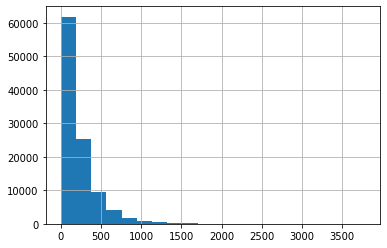

In [31]:
users['anime_id'].hist(bins =)

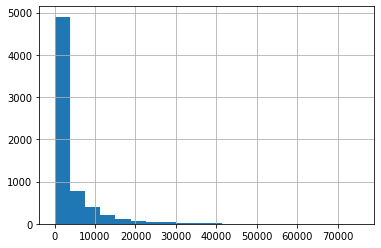

In [33]:
anime['user_id'].hist(bins =20)

In [39]:
userlist = pd.read_csv('final_anime_2.csv')
userlist

,Unnamed: 0,anime_id,username,my_score,user_id,stats_mean_score,my_watched_episodes,my_status
0,0,21,karthiga,9,2255153,7.43,586,1
1,1,59,karthiga,7,2255153,7.43,26,2
2,2,74,karthiga,7,2255153,7.43,26,2
3,3,120,karthiga,7,2255153,7.43,26,2
4,4,178,karthiga,7,2255153,7.43,26,2
...,...,...,...,...,...,...,...,...
21994561,22691303,15611,Yokonightcore,9,4862000,9.00,48,1
21994562,22691304,27815,Yokonightcore,9,4862000,9.00,22,1
21994563,22691305,5945,wargod,8,299167,8.00,39,2
21994564,22691306,1316,JMc_SetoKai_LoVe,9,263803,9.00,52,2


In [27]:
userlist.loc[userlist['username'] == 'Nyaaa-']


,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
18593,Nyaaa-,61503,136,361,0,2,766,115.58,Male,The Netherlands,1991-08-18,NaN,2008-05-18,2018-05-16 18:38:28,8.27,10.0,7039.0


In [3]:
file = pd.read_csv('final_anime.csv')

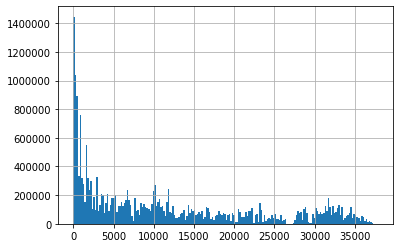

In [6]:
file['anime_id'].hist(bins =200)

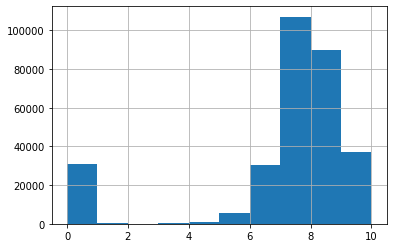

In [40]:
userlist.stats_mean_score.hist(bins =10)

In [53]:
# scoresdf = pd.read_csv('animelists_cleaned.csv')
scoresdf = scoresdf.merge(userlist[['username', 'user_id']], on = 'username')

scoresdf

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags,user_id
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN,2255153
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN,2255153
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN,2255153
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN,2255153
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN,2255153
...,...,...,...,...,...,...,...,...,...,...,...,...
31284025,Yokonightcore,15611,48,2014-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:33:03,NaN,4862000
31284026,Yokonightcore,27815,22,0000-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:32:05,NaN,4862000
31284027,wargod,5945,39,0000-00-00,0000-00-00,8,2,0.0,0,2010-03-29 04:24:12,NaN,299167
31284028,JMc_SetoKai_LoVe,1316,52,0000-00-00,0000-00-00,9,2,NaN,0,2009-12-23 05:45:14,NaN,263803


In [75]:
# fig,ax = plt.subplots(figsize = (20,10))
d = {'col1': [1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3], 'col2': [3, 4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]}
df = pd.DataFrame(data=d)





In [71]:
hmmm.user_id.value_counts()[hmmm.user_id.value_counts().index == 1]

1    248
Name: user_id, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x4119f6150>]],
      dtype=object)

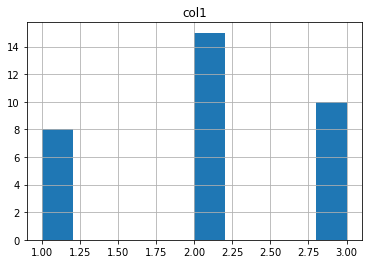

In [77]:
df.hist('col1')

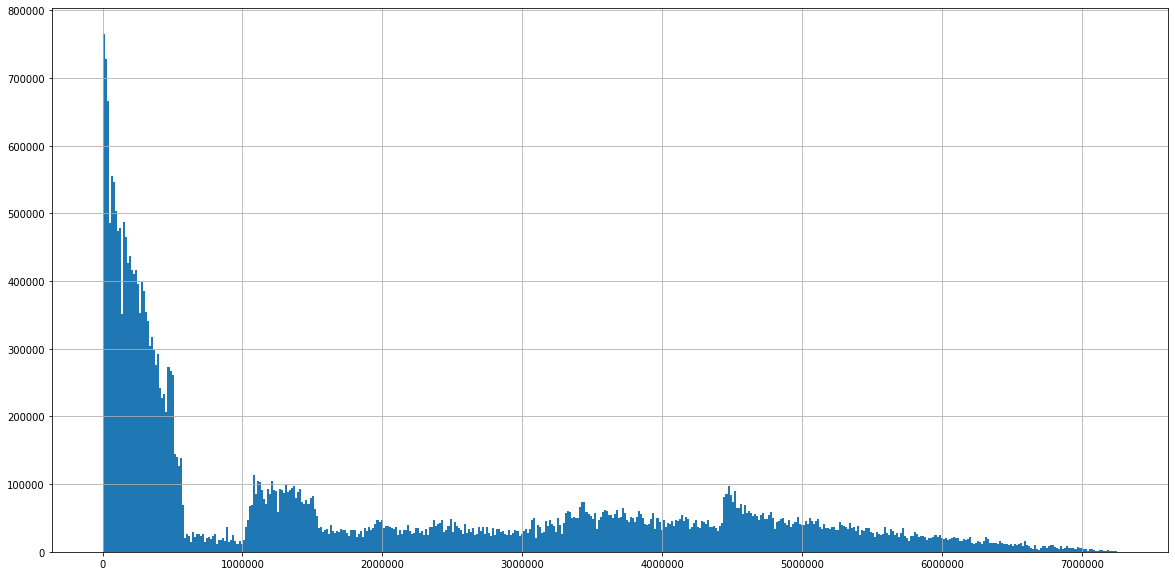

In [80]:
scoresdf_1.hist(figsize = (20,10), bins = 500)

In [92]:
scoresdf_1.value_counts()[scoresdf_1.value_counts().index ==7251737]

7251737    61
Name: user_id, dtype: int64

In [96]:
scoresdf.loc[scoresdf['anime_id'] == 1535]


,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags,user_id
114,Damonashu,1535,37,0000-00-00,2008-07-01,7,2,0.0,0,2008-07-02 05:18:00,NaN,37326
461,bskai,1535,37,0000-00-00,0000-00-00,10,2,0.0,0,2010-05-18 18:27:35,NaN,228342
878,Slimak,1535,37,0000-00-00,0000-00-00,7,2,0.0,0,2016-12-09 16:25:27,NaN,61677
1383,MistButterfly,1535,37,0000-00-00,0000-00-00,10,2,0.0,0,2013-04-25 20:18:16,NaN,2485327
4672,kioniel,1535,37,0000-00-00,0000-00-00,10,2,0.0,0,2009-01-29 14:44:12,NaN,144049
...,...,...,...,...,...,...,...,...,...,...,...,...
31266783,slowestpulse,1535,0,0000-00-00,0000-00-00,0,6,0.0,0,2015-01-06 19:14:16,NaN,4390353
31266790,FELIPERIN,1535,37,0000-00-00,0000-00-00,9,2,0.0,0,2018-01-17 03:38:32,NaN,6900967
31266849,Ignatiusloyola,1535,37,0000-00-00,2017-07-01,8,2,0.0,0,2017-06-30 23:22:28,NaN,6354795
31266869,Hoshimiya_Mukuro,1535,37,0000-00-00,0000-00-00,10,2,0.0,0,2018-02-15 07:10:36,NaN,6766359


In [108]:
train1 = pd.read_csv('train1.csv')
train2 = pd.read_csv('train2.csv')
train3 = pd.read_csv('train3.csv')
train4 = pd.read_csv('train4.csv')
train5 = pd.read_csv('train5.csv')
train6 = pd.read_csv('train6.csv')
train7 = pd.read_csv('train7.csv')
train8 = pd.read_csv('train8.csv')

df = train1.concat(train2)
# df = pd.concat(df, train3)

# df = pd.concat(df, train4)
# df = pd.concat(df, train5)
# df = pd.concat(df, train6)
# df = pd.concat(df, train7)
# df = pd.concat(df, train8)
df

AttributeError: 'DataFrame' object has no attribute 'concat'

In [122]:
df = pd.read_csv('test.csv')
df

,Unnamed: 0,anime_id,my_score,user_id,stats_mean_score
0,0,2129,7,361909,8.67
1,1,4744,7,361909,8.67
2,2,6324,9,361909,8.67
3,3,8536,10,361909,8.67
4,4,8861,10,361909,8.67
...,...,...,...,...,...
4660228,4660228,10737,8,3739031,7.83
4660229,4660229,1401,9,6432461,8.89
4660230,4660230,31885,9,6432461,8.89
4660231,4660231,5959,10,6432461,8.89


In [121]:
# df = pd.read_csv('test.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.to_csv('test.csv')

In [119]:
df = pd.read_csv('test.csv')

df = df.drop(['Unnamed: 0', '_c0'], axis = 1)
df.to_csv('test.csv')

In [113]:
pd.read_csv('train.csv')

,_c0,anime_id,my_score,user_id,stats_mean_score
0,0,21,9,2255153,7.43
1,1,59,7,2255153,7.43
2,10,721,7,2255153,7.43
3,10000,31559,8,5285183,8.35
4,1000001,8425,7,61503,8.27
...,...,...,...,...,...
10885661,22684274,10737,8,3739031,7.83
10885662,22684275,368,10,6432461,8.89
10885663,22684277,1401,9,6432461,8.89
10885664,22684289,5959,10,6432461,8.89
